**21-03-22 ML_DL 05_tensorflow ver1_머신러닝 (c)cherryuki (ji)**

# 05. 머신러닝 with tensorflow
## 1. tensroflow ver2.x에서 ver1 사용하기

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#ver1로 사용하기

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#tensor=data(상수, 변수) 연산
#node1 상수 tensor 선언
node1 = tf.constant('Hello, TensorFlow')
#graph(computational graph 생성)
sess = tf.Session()
#print(node1)
print(sess.run(node1)) #b가 의미하는 것: byte literals
#https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal 
print(sess.run(node1).decode())

b'Hello, TensorFlow'
Hello, TensorFlow


In [3]:
#간단한 수학연산 수행(computation graph)
node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)
#node3 = node1+node2
node3 = tf.add(node1, node2)
#computational graph실행
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


### Tensorflow
<ol>
    <li>그래프 정의</li>
    <li>sess = tf.Session()을 실행</li>
    <li>sess.run()을 통해 값을 확인할 수 있음</li>
</ol>

In [4]:
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node2))

[1 2 3]
[1. 2. 3.]


In [5]:
data = [1., 2., 3., 4.]
m = tf.reduce_mean(data) #reduce_mean(); 평균값 연산
sess = tf.Session()
print(sess.run(m))

2.5


## 2. tensorflow ver1을 이용한 linear regression을 구현
- 독립변수 x가 1개

In [7]:
#tensro graph 정의

#train data set
#x = np.array([1,2,3])
#y = np.array([1,2,3])
x = [1,2,3]
y = [1,2,3]

#Weight & bias(처음에는 랜덤값을 세팅했다가 학습과정에서 변경)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#Hypothesis(가설)
H = W*x+b

#Cost function(최소 제곱법)
cost = tf.reduce_mean(tf.square(H-y))

#cost function minimize(목적: cost함수가 최소가 되는 W와 b를 찾는 것)
'''
cost함수는 제곱의 평균인 2차 함수이므로 곡선. 곡선 위의 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#Session; runnder 생성
sess = tf.Session()

#Variable 노드 초기화
sess.run(tf.global_variables_initializer())

#6000번 학습(tensorflow ver2. fit()함수)
"""
for step in range(1,6001):
    sess.run(train)
    if step%300 == 0:
        print("{:4d}번째 cost:{}, W:{}, b:{}".format(step, sess.run(cost), 
                                                sess.run(W), sess.run(b)))
"""
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200==0:
        print("{:4d}번째 cost:{}, W:{}, b:{}".format(step, cost_val, W_val, b_val))

 200번째 cost:0.00689883716404438, W:[1.0962362], b:[-0.2187675]
 400번째 cost:0.0026343094650655985, W:[1.059468], b:[-0.135185]
 600번째 cost:0.0010059115011245012, W:[1.0367477], b:[-0.08353614]
 800번째 cost:0.0003841047000605613, W:[1.0227079], b:[-0.05162028]
1000번째 cost:0.0001466700923629105, W:[1.014032], b:[-0.03189807]
1200번째 cost:5.6005341320997104e-05, W:[1.0086709], b:[-0.01971106]
1400번째 cost:2.1385072614066303e-05, W:[1.0053581], b:[-0.01218018]
1600번째 cost:8.166013685695361e-06, W:[1.0033109], b:[-0.00752654]
1800번째 cost:3.1185693387669744e-06, W:[1.0020461], b:[-0.0046512]
2000번째 cost:1.1912467243746505e-06, W:[1.0012646], b:[-0.00287471]
2200번째 cost:4.553719463729067e-07, W:[1.000782], b:[-0.00177731]
2400번째 cost:1.7423269582650391e-07, W:[1.0004838], b:[-0.00109935]
2600번째 cost:6.674971331221968e-08, W:[1.0002997], b:[-0.00068035]
2800번째 cost:2.5606516018683578e-08, W:[1.0001854], b:[-0.00042158]
3000번째 cost:9.819459023674426e-09, W:[1.000115], b:[-0.00026103]
3200번째 cost:3.

In [8]:
sess.run([W, b])

[array([1.0000044], dtype=float32), array([-8.861246e-06], dtype=float32)]

In [9]:
W_, b_ = sess.run([W,b])

In [10]:
print("최종적으로 나온 회귀식: H = {}*x+{}".format(W_[0], b_[0]))

최종적으로 나온 회귀식: H = 1.0000044107437134*x+-8.861245987645816e-06


In [12]:
x = [1,2,3]
y = [1,2,3]

#Weight & bias(처음에는 랜덤값을 세팅했다가 학습과정에서 변경)
W = tf.Variable(100.0, name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#Hypothesis(가설)
H = W*x+b

#Cost function(최소 제곱법)
cost = tf.reduce_mean(tf.square(H-y))

#cost function minimize(목적: cost함수가 최소가 되는 W와 b를 찾는 것)
'''
cost함수는 제곱의 평균인 2차 함수이므로 곡선. 곡선 위의 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#Session; runnder 생성
sess = tf.Session()

#Variable 노드 초기화
sess.run(tf.global_variables_initializer())

#4000번 학습(tensorflow ver2. fit()함수)
for step in range(1, 4001):
    cost_val, W_val, b_val = sess.run([cost, W, b])
    if step%200==1:
        print("{:4d}번째 cost:{}, W:{}, b:{}".format(step, cost_val, W_val, b_val))
    sess.run(train)

   1번째 cost:45931.61328125, W:100.0, b:[0.48832226]
 201번째 cost:71.30884552001953, W:10.807709693908691, b:[-22.29523]
 401번째 cost:27.22920036315918, W:7.0605692863464355, b:[-13.777098]
 601번째 cost:10.397439956665039, W:4.745063304901123, b:[-8.51341]
 801번째 cost:3.97025203704834, W:3.3142220973968506, b:[-5.2607703]
1001번째 cost:1.5160373449325562, W:2.430048942565918, b:[-3.2508373]
1201번째 cost:0.5788976550102234, W:1.883683681488037, b:[-2.0088208]
1401번째 cost:0.22105109691619873, W:1.5460624694824219, b:[-1.2413282]
1601번째 cost:0.08440816402435303, W:1.3374334573745728, b:[-0.7670655]
1801번째 cost:0.03223118185997009, W:1.2085134983062744, b:[-0.47400007]
2001번째 cost:0.012307435274124146, W:1.1288485527038574, b:[-0.2929032]
2201번째 cost:0.004699577111750841, W:1.0796204805374146, b:[-0.18099624]
2401번째 cost:0.0017945297295227647, W:1.0492006540298462, b:[-0.11184467]
2601번째 cost:0.0006852350197732449, W:1.0304028987884521, b:[-0.06911308]
2801번째 cost:0.00026165906456299126, W:1.0187

## 2.1 predict를 하기 위한 placeholder 노드

In [13]:
#placeholder 이용
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(tf.float32)
#ab = tf.add(a+b)
ab = a+b
sess = tf.Session()
sess.run(ab, feed_dict={a:10, b:20})

30.0

In [14]:
sess.run(ab, feed_dict={a:[1,2,3], b:[10,10,10]})

array([11., 12., 13.], dtype=float32)

In [15]:
sess.run(ab, feed_dict={a:np.array([1,2,3]),
                       b:np.array([10,10,10])})

array([11., 12., 13.], dtype=float32)

In [17]:
#그래프 실행단계에서 값을 던져줌
node1 = tf.placeholder(tf.float32)
node2 = tf.placeholder(tf.float32)
adder_node = node1+node2
sess = tf.Session()
result = sess.run(adder_node, feed_dict={node1:input("node1값은? "),
                                        node2:input("node2값은? ")})
print(result)

node1값은? 10
node2값은? 20
30.0


In [19]:
#training data set(H=2x+3)
x_data = [1,2,3]
y_data = [5,7,9]

#placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

#Weight & bias
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#Hypothesis
H = W*x+b

#cost function
cost = tf.reduce_mean(tf.square(H-y))

#경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(1,6001):
    _, cost_val_, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={x:x_data, y:y_data})
    if step%200==0:
        print("{:4d}번째 cost:{}, W:{}, b:{}".format(step, cost_val, W_val, b_val))

 200번째 cost:8.157917363860179e-07, W:[2.5854847], b:[1.6690556]
 400번째 cost:8.157917363860179e-07, W:[2.3617938], b:[2.1775577]
 600번째 cost:8.157917363860179e-07, W:[2.2235663], b:[2.491781]
 800번째 cost:8.157917363860179e-07, W:[2.1381505], b:[2.6859517]
1000번째 cost:8.157917363860179e-07, W:[2.0853689], b:[2.8059368]
1200번째 cost:8.157917363860179e-07, W:[2.0527525], b:[2.8800814]
1400번째 cost:8.157917363860179e-07, W:[2.0325973], b:[2.925899]
1600번째 cost:8.157917363860179e-07, W:[2.0201433], b:[2.9542093]
1800번째 cost:8.157917363860179e-07, W:[2.0124476], b:[2.9717038]
2000번째 cost:8.157917363860179e-07, W:[2.0076916], b:[2.9825153]
2200번째 cost:8.157917363860179e-07, W:[2.0047529], b:[2.9891956]
2400번째 cost:8.157917363860179e-07, W:[2.002937], b:[2.993323]
2600번째 cost:8.157917363860179e-07, W:[2.0018158], b:[2.995873]
2800번째 cost:8.157917363860179e-07, W:[2.0011234], b:[2.9974473]
3000번째 cost:8.157917363860179e-07, W:[2.0006957], b:[2.9984195]
3200번째 cost:8.157917363860179e-07, W:[2.00043

In [20]:
sess.run([W,b])

[array([2.000026], dtype=float32), array([2.999942], dtype=float32)]

In [21]:
#예측해보기(predict)
sess.run(H, feed_dict={x:5})

array([13.000072], dtype=float32)

In [22]:
sess.run(H, feed_dict={x:np.array([1,10,20])})

array([ 4.999968, 23.000202, 43.00046 ], dtype=float32)

## 2.2 scale이 다른 데이터들의 linear regression을 구현

In [23]:
#training data set
x_data = [1,2,5,8,10]
y_data = [5,15,68,80,95]

#placeholder를 설정
x = tf.placeholder(dtype=tf.float32, shape=None)
y = tf.placeholder(dtype=tf.float32, shape=None)

#Weight & bias
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#Hypothesis
H = W*x+b

#cost function
cost = tf.reduce_mean(tf.square(H-y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#train = optimizer.minimize(cost)

#Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(1, 6001):
    _, cost_val, W_val = sess.run([train, cost, W], feed_dict={x:x_data, y:y_data})
    if step%200==0:
        print("{}번째 cost:{}, W:{}".format(step, cost_val, W_val))

200번째 cost:79.17534637451172, W:[10.113657]
400번째 cost:79.14275360107422, W:[10.145868]
600번째 cost:79.13975524902344, W:[10.155624]
800번째 cost:79.13949584960938, W:[10.15858]
1000번째 cost:79.13948059082031, W:[10.159474]
1200번째 cost:79.13945007324219, W:[10.159746]
1400번째 cost:79.13945770263672, W:[10.159828]
1600번째 cost:79.13945007324219, W:[10.159853]
1800번째 cost:79.13948059082031, W:[10.15986]
2000번째 cost:79.13947296142578, W:[10.159862]
2200번째 cost:79.13946533203125, W:[10.1598625]
2400번째 cost:79.13946533203125, W:[10.1598625]
2600번째 cost:79.13946533203125, W:[10.1598625]
2800번째 cost:79.13946533203125, W:[10.1598625]
3000번째 cost:79.13946533203125, W:[10.1598625]
3200번째 cost:79.13946533203125, W:[10.1598625]
3400번째 cost:79.13946533203125, W:[10.1598625]
3600번째 cost:79.13946533203125, W:[10.1598625]
3800번째 cost:79.13946533203125, W:[10.1598625]
4000번째 cost:79.13946533203125, W:[10.1598625]
4200번째 cost:79.13946533203125, W:[10.1598625]
4400번째 cost:79.13946533203125, W:[10.1598625]
4600

In [24]:
sess.run([W,b])

[array([10.1598625], dtype=float32), array([-0.23128368], dtype=float32)]

In [25]:
#예측을 할 수는 있으나 cost 너무 큰 값이나 신뢰할 수 없음
sess.run(H, feed_dict={x:10})

array([101.36734], dtype=float32)

In [ ]:
"""
예측이 제대로 안되는 이유: GradientDescentOptimizer에서 
local 최소값을 만나면 global 최소값이 따로 있어도 멈춤
"""

## 3. 독립변수 x가 여러개인 linear regression
- scale이 다른 x, y값

In [34]:
#trining data set(np.array나 list로 생성)
x_data = np.array([[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152],[185],[180],[196],[142]])
#np.c_[x_data, y_data]

#placeholder
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

#Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#Hypothesis
#H = X@W+b
H = tf.matmul(X, W) + b

#cost function
cost = tf.reduce_mean(tf.square(H-Y))

#train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost) 
#learning_rate=0.01=1e-2 -> cost: nan 으로 나와서 1e-5로 조정

#session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(1, 30001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%3000==0:
        print("{}번째 cost:{}".format(step, cost_val))

3000번째 cost:0.8595651388168335
6000번째 cost:0.34749746322631836
9000번째 cost:0.24010486900806427
12000번째 cost:0.21322080492973328
15000번째 cost:0.20295949280261993
18000번째 cost:0.19663408398628235
21000번째 cost:0.19166818261146545
24000번째 cost:0.18747270107269287
27000번째 cost:0.1838529407978058
30000번째 cost:0.18073228001594543


## 4. Ozone량 예측 예제
- 독립변수 x가 3 => Multi-variable Linear Regression

In [35]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd

In [47]:
#training data set 생성
#data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=',')

#data를 바로 학습할 수 없음. 데이터 정제 작업 필요
data = data.dropna(how='any') #결측치가 한 열이라도 있는 행 모두 제거
data.isna().sum()

#필요한 columns만 추출
data = data.iloc[:, 0:4]
data.head()

#training data set
x_data = data.iloc[:, 1:].values #values -> DataFrame을 numpy배열로 바꿔줌
y_data = data[['Ozone']].values.reshape(-1, 1)
#y_data = data['Ozone'].values.reshape(-1,1) 
x_data.shape, y_data.shape #(111,3), (111,1)

#tensorflow 구현
#1. placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

#2. Weight&bias 설정
W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#3. Hypothsis
# H = X@W+b
H = tf.matmul(X,W)+b

#4. cost함수
cost = tf.reduce_mean(tf.square(H-Y))

#5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

#6. session&variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#7. 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300==0:
        print("{:4d}번째 cost:{}".format(step, cost_val))

 300번째 cost:775.7948608398438
 600번째 cost:715.5421142578125
 900번째 cost:666.9257202148438
1200번째 cost:627.6930541992188
1500번째 cost:596.032958984375
1800번째 cost:570.4834594726562
2100번째 cost:549.8651733398438
2400번째 cost:533.2261352539062
2700번째 cost:519.7986450195312
3000번째 cost:508.96221923828125
3300번째 cost:500.2169189453125
3600번째 cost:493.15924072265625
3900번째 cost:487.46331787109375
4200번째 cost:482.8663330078125
4500번째 cost:479.1560974121094
4800번째 cost:476.1614990234375
5100번째 cost:473.7444152832031
5400번째 cost:471.79327392578125
5700번째 cost:470.2182922363281
6000번째 cost:468.94671630859375


In [48]:
data[1:2]

,Ozone,Solar.R,Wind,Temp
1,36.0,118.0,8.0,72


In [49]:
sess.run(H, feed_dict={X:np.array([[118, 8, 72]])})

array([[41.030895]], dtype=float32)

## scale 맞추는 방법: normalization(많이 사용), standardization(표준화)

In [ ]:
"""
scale 맞추는 방법: normalization, standardization
                  X - Xmin
normalization = -------------
                 Xmax - Xmin

상기 식을 사용하거나, sklearn 라이브러리(sklearn.preprocessing.MinMaxScaler) 사용
                    X - Xmean(평균)
standardization = -------------------
                     Xstd(표준편차)
상기 식을 사용하거나, sklearn 라이브러리(sklearn.preprocessing.StandardScaler) 사용
"""

In [50]:
#training data set 생성
#data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=',')

#data를 바로 학습할 수 없음. 데이터 정제 작업 필요
data = data.dropna(how='any') #결측치가 한 열이라도 있는 행 모두 제거
data.isna().sum()

#필요한 columns만 추출
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]
data.head()

### scale 조정(standardization) ###
#                     X - Xmean(평균)
# standardization = -------------------
#                      Xstd(표준편차)

data['Ozone'] = (data['Ozone']-data['Ozone'].mean()) / data['Ozone'].std()
data['Solar.R'] = (data['Solar.R']-data['Solar.R'].mean()) / data['Solar.R'].std()
data['Wind'] = (data['Wind']-data['Wind'].mean()) / data['Wind'].std()
data['Temp'] = (data['Temp']-data['Temp'].mean()) / data['Temp'].std()

#training data set
x_data = data.iloc[:,1:].values 
y_data = data[['Ozone']].values.reshape(-1,1)

#tensorflow 구현
#1. placeholder
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

#2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

#4. cost함수
cost = tf.reduce_mean(tf.square(H-Y))

#5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

#6. session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%3000==0:
        print("{:5d}번째 cost:{}".format(step, cost_val))

 3000번째 cost:6.9066009521484375
 6000번째 cost:6.15825080871582
 9000번째 cost:5.506045818328857
12000번째 cost:4.936384677886963
15000번째 cost:4.437758445739746
18000번째 cost:4.0003862380981445
21000번째 cost:3.6158769130706787
24000번째 cost:3.2772152423858643
27000번째 cost:2.9783270359039307
30000번째 cost:2.7139980792999268
33000번째 cost:2.4798130989074707
36000번째 cost:2.2719478607177734
39000번째 cost:2.0871243476867676
42000번째 cost:1.9225045442581177
45000번째 cost:1.775651216506958
48000번째 cost:1.6444295644760132
51000번째 cost:1.526999831199646
54000번째 cost:1.4217637777328491
57000번째 cost:1.3273147344589233
60000번째 cost:1.242444396018982


In [51]:
#predict 하려면 scale이 맞춰진 데이터로 predict를 하고 결과를 다시 scale조정

In [53]:
#data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=',')

#data를 바로 학습할 수 없음. 데이터 정제 작업 필요
data = data.dropna(how='any') #결측치가 한 열이라도 있는 행 모두 제거
data.isna().sum()

#필요한 columns만 추출
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]

#training data set
x_data = data[['Solar.R','Wind','Temp']].values #values -> DataFrame을 numpy배열로 바꿔줌
y_data = data[['Ozone']].values.reshape(-1,1)
print("scale조정 전 데이터(상위 3행):\n", np.c_[x_data[:3], y_data[:3]])

### scale 조정 (1) sklearn.preprocessing.MinMaxScaler ###
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler() #scale_x: x_data를 scale조정할 객체
#x_data에 대한 설정을 잡는 부분; x_data 3개 컬럼에 대한 max, min 설정
scale_x.fit(x_data)
x_data = scale_x.transform(x_data) #scale 조정된 x_data

scale_y = MinMaxScaler()
scale_y.fit(y_data)
y_data = scale_y.transform(y_data) #scale 조정된 y_data
print('scale조정 후 데이터(상위 3행):\n', np.c_[x_data[:3], y_data[:3]])

#tensorflow 구현
#1. placeholder
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

#2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

#4. cost함수
cost = tf.reduce_mean(tf.square(H-Y))

#5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

#6. session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%3000==0:
        print("{:5d}번째 cost:{}".format(step, cost_val))

scale조정 전 데이터(상위 3행):
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]
 [149.   12.6  74.   12. ]]
scale조정 후 데이터(상위 3행):
 [[0.55963303 0.27717391 0.25       0.23952096]
 [0.33944954 0.30978261 0.375      0.20958084]
 [0.43425076 0.55978261 0.425      0.06586826]]
 3000번째 cost:2.814135789871216
 6000번째 cost:2.2911946773529053
 9000번째 cost:1.8679245710372925
12000번째 cost:1.5253195762634277
15000번째 cost:1.248000144958496
18000번째 cost:1.023505449295044
21000번째 cost:0.8417638540267944
24000번째 cost:0.6946241855621338
27000번째 cost:0.5754843354225159
30000번째 cost:0.4790039658546448
33000번째 cost:0.40086856484413147
36000번째 cost:0.33757203817367554
39000번째 cost:0.2862900197505951
42000번째 cost:0.24472710490226746
45000번째 cost:0.21103188395500183
48000번째 cost:0.18370410799980164
51000번째 cost:0.161529079079628
54000번째 cost:0.14352643489837646
57000번째 cost:0.12889403104782104
60000번째 cost:0.1170002892613411


In [56]:
#8. prediction
input_data = np.array([[118., 8.,72.]])
scale_input_data = scale_x.transform(input_data)
print('원 데이터 : ', input_data)
print('scale 조정된 데이터 :', scale_input_data)

원 데이터 :  [[118.   8.  72.]]
scale 조정된 데이터 : [[0.33944954 0.30978261 0.375     ]]


In [57]:
predict_value = sess.run(H, feed_dict={X:scale_input_data})
scale_y.inverse_transform(predict_value)

array([[9.537198]], dtype=float32)

In [58]:
#data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=',')

#data를 바로 학습할 수 없음. 데이터 정제 작업 필요
data = data.dropna(how='any') #결측치가 한 열이라도 있는 행 모두 제거
data.isna().sum()

#필요한 columns만 추출
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]
data.head()

### scale 조정 (2); data를 한꺼번에 scale조정시 prediction이 어려워짐
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(data)
# data = pd.DataFrame(scaler.transform(data), columns=['Ozone', 'Solar.R', 'Wind', 'Temp'])
# display(data.head())
# type(data)

#training data set
x_data = data.iloc[:,1:].values #values -> DataFrame을 numpy배열로 바꿔줌
y_data = data[['Ozone']].values.reshape(-1,1)

print('조정 전:\n', np.c_[x_data[:3], y_data[:3]])
### scale 조정 (2); x_data, y_data scale을 따로따로 - prediction 가능
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data = scaler_x.transform(x_data)

scaler_y = StandardScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)
print('조정 후:\n', np.c_[x_data[:3], y_data[:3]])

#tensorflow 구현
#1. placeholder
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

#2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

#4. cost함수
cost = tf.reduce_mean(tf.square(H-Y))

#5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

#6. session & variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%3000==0:
        print("{:5d}번째 cost:{}".format(step, cost_val))

조정 전:
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]
 [149.   12.6  74.   12. ]]
조정 후:
 [[ 0.05728624 -0.71707784 -1.13764691 -0.03317961]
 [-0.73618283 -0.54766534 -0.61060682 -0.18411965]
 [-0.39455031  0.75116384 -0.39979078 -0.90863181]]
 3000번째 cost:6.022195816040039
 6000번째 cost:5.480643272399902
 9000번째 cost:4.994199275970459
12000번째 cost:4.55690860748291
15000번째 cost:4.163577079772949
18000번째 cost:3.809532642364502
21000번째 cost:3.490656614303589
24000번째 cost:3.2032718658447266
27000번째 cost:2.9441211223602295
30000번째 cost:2.710273027420044
33000번째 cost:2.499174118041992
36000번째 cost:2.3084702491760254
39000번째 cost:2.1360979080200195
42000번째 cost:1.9802300930023193
45000번째 cost:1.839184284210205
48000번째 cost:1.7114977836608887
51000번째 cost:1.5958412885665894
54000번째 cost:1.4910119771957397
57000번째 cost:1.3959652185440063
60000번째 cost:1.3097290992736816


In [59]:
input_data = np.array([[118, 8, 72]])
scaled_input_data = scaler_x.transform(input_data)
scaler_y.inverse_transform(sess.run(H, feed_dict={X:scaled_input_data}))

array([[43.10341]], dtype=float32)

In [61]:
sess.run([W,b])

[array([[-0.7266306],
        [-0.2626303],
        [ 1.2059515]], dtype=float32),
 array([0.08791379], dtype=float32)]

## 5. Logistic Regression = Binary classification(2개 그룹)
### Logistic Regression이 필요한 이유(기존의 liner regression으로는 안되는 경우)

w값: 0.035005834305717624 b값: 0.17327887981330214


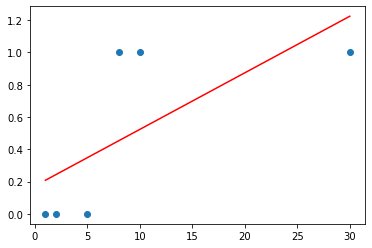

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.array([1,2,5,8,10,30])
y = np.array([0,0,0,1,1,1])
lm = stats.linregress(x,y)
print('w값:', lm[0], 'b값:', lm[1])
plt.scatter(x,y)
plt.plot(x, x*lm[0]+lm[1], 'r')